# G√©n√©ral

In [6]:
import numpy as np
RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)
import pandas as pd
from sklearn.metrics import classification_report
import json
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# from sklearn.svm import LinearSVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords

In [7]:
data =pd.read_csv("corpus/donnees_classifieur.csv",sep=",,") #oral = 1, √©crit = 0

# Exploration des donn√©es : forme, nombre d'instances par cat√©gorie

Nombre de lignes et de colonnes : (3201, 2)
Premi√®res lignes du document : 
                                               texte  label
0  Leos Carax,cin√©aste (dernier film : Annette) L...      0
1  enflamm√©s frapper douze jeunes antiracistes lo...      0
2  mercie ces jeunes gar√ßons et filles de s'√™tre ...      0
3  x, p√©rilleux, me fait toujours soup√ßonner : re...      0
4  e)commenc√© ? Je pense au jeune plombier Isador...      0


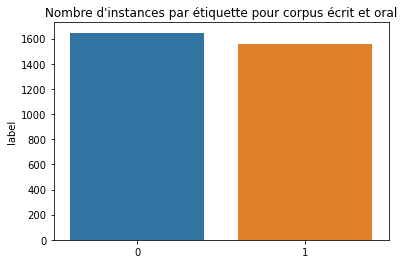

In [8]:
def exploration_donnees(dataset,nom_dataset,label='label'):
    
    
    #pr√©ciser le nom de la cat√©gorie qui contient les √©tiquettes ("label" pour les tweets)
    print("Nombre de lignes et de colonnes :", dataset.shape)
    print("Premi√®res lignes du document : ")
    print(dataset.head())
    x=dataset[label].value_counts()
    titre = "Nombre d'instances par √©tiquette pour %s"%nom_dataset
    sns.barplot(x.index,x).set(title=titre)
    plt.savefig("%s.png"%titre)

exploration_donnees(data,"corpus √©crit et oral")

Moyenne de mots par classe : 
25.78185328185328 pour les oral
25.140862173649058 pour les √©crit

Moyenne de caract√®res par instance: 
142.3056628056628 pour les oral
144.05403764420157 pour les √©crit

Moyenne de mots uniques par instance : 
21.27155727155727 pour les oral
23.423800850030357 pour les √©crit


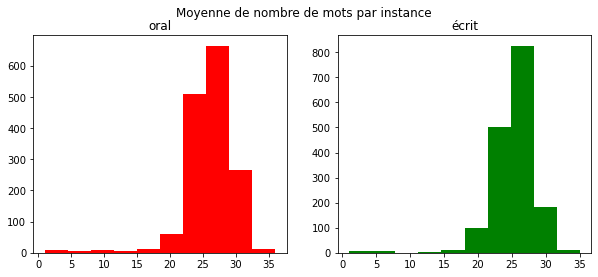

In [10]:
# fonction adapt√©e du code disponible √† l'adresse 
#https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

def stats_donnees(dataset, cat_1="oral", cat_0="√©crit", label="label"):
    
    ''' Fonction qui fournit des statistiques et des graphiques sur les donn√©es '''
    #1. WORD-COUNT
    dataset['word_count'] = dataset["texte"].apply(lambda x: len(str(x).split()))
    print("Moyenne de mots par classe : ")
    print(dataset[dataset[label]==1]['word_count'].mean(), "pour les %s"%cat_1) 
    print(dataset[dataset[label]==0]['word_count'].mean(), "pour les %s"%cat_0) 
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['texte'].apply(lambda x: len(str(x)))
    print("\nMoyenne de caract√®res par instance: ")
    print(dataset[dataset[label]==1]['char_count'].mean(), "pour les %s"%cat_1) 
    print(dataset[dataset[label]==0]['char_count'].mean(), "pour les %s"%cat_0)

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['texte'].apply(lambda x: len(set(str(x).split())))
    print("\nMoyenne de mots uniques par instance : ")
    print(dataset[dataset[label]==1]['unique_word_count'].mean(), "pour les %s"%cat_1)
    print(dataset[dataset[label]==0]['unique_word_count'].mean(), "pour les %s"%cat_0)
    
    #Plotting word-count per tweet
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
    train_words=dataset[dataset[label]==1]['word_count']
    ax1.hist(train_words,color='red')
    ax1.set_title(cat_1)
    train_words=dataset[dataset[label]==0]['word_count']
    ax2.hist(train_words,color='green')
    ax2.set_title(cat_0)
    fig.suptitle('Moyenne de nombre de mots par instance')
    plt.show()
    
stats_donnees(data)

# Entra√Ænement des classifieurs

On commence par tester plusieurs classifieurs avec le CountVectorizer par d√©faut pour voir si certains classifieurs se d√©marquent

In [11]:
#INPUT (constant) : imports et initialisations de variables √† r√©utiliser

# stopw_en = set(stopwords.words('english'))
# stopw_fr = set(stopwords.words('french'))

X1 = data["texte"],
y = data["label"],
stopw = set(stopwords.words('french'))
    
liste_vec = [["CountVectorizer", CountVectorizer()],
             ["TFIDFVectorizer", TfidfVectorizer()]]
#liste de listes de classifieurs (pour √©tapes suivantes)


liste_classif = [["Perceptron", Perceptron(eta0=0.1, random_state=RANDOM_SEED)], 
                 ["SVM", svm.SVC(random_state=RANDOM_SEED)],
                 ["Nearest Neighbors", KNeighborsClassifier(3)],
                 ["Random Forest", RandomForestClassifier(random_state=RANDOM_SEED)],
                 ["DecisionTree",DecisionTreeClassifier(random_state=RANDOM_SEED)]]

liste_param = [["sans stop_words",CountVectorizer(stop_words=stopw)],
               ["avec 1000 mots",CountVectorizer(max_features=1000)],
               ["avec 2000 mots",CountVectorizer(max_features=2000)],
               ["avec 500 mots",CountVectorizer(max_features=500)],
               ["avec bigrammes",CountVectorizer(ngram_range=(2,2))],
               ["par caract√®re",CountVectorizer(analyzer='char')]]

def trier_dic(dic):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=True)
    return [[car,effectif] for effectif,car in L_sorted]

Perceptron


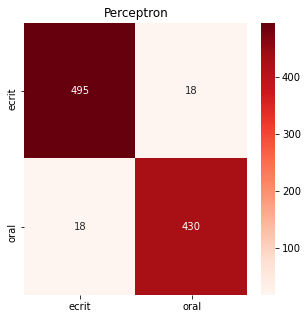

**************
SVM


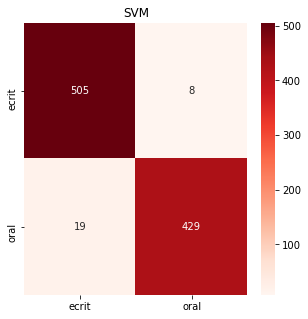

**************
Nearest Neighbors


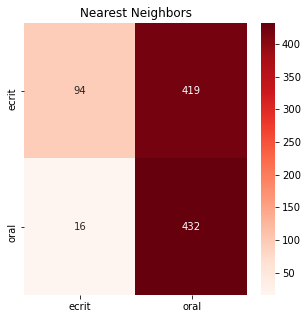

**************
Random Forest


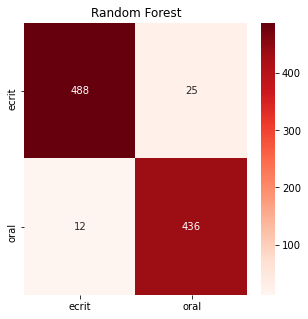

**************
DecisionTree


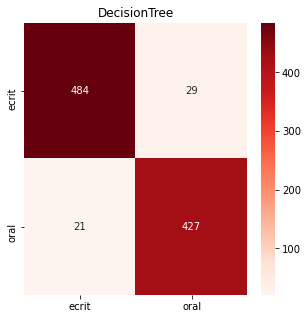

**************
Voici l'ordre de classement des classifieurs [['SVM', 0.97], ['Random Forest', 0.96], ['Perceptron', 0.96], ['DecisionTree', 0.95], ['Nearest Neighbors', 0.55]]


In [12]:
#SEULEMENT SUR DIFFERENTS CLASSIFIEURS, AVEC MEME PRETRAITEMENTS
V = CountVectorizer()
X1 = data["texte"].fillna("x").values.tolist()
y = data["label"]
stopw = set(stopwords.words('french'))
X = V.fit_transform(X1)

#faire varier taille test_size et en tirer graphiques
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
dico_acc_g = {}

for nom, classif in liste_classif:
    classif.fit(X_train, y_train)
    y_pred = classif.predict(X_test)
    dico_acc_g[nom]=round(accuracy_score(y_test,y_pred),2)
    print(nom)
    fig, ax = plt.subplots(figsize=(5,5))
    classes = ["ecrit", "oral"]
    
    matrice_confusion = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrice_confusion, cmap = plt.cm.Reds, 
                xticklabels=classes, yticklabels=classes, 
                annot=True, fmt ="d")

    nom_img = "oralecrit_conf_matrix_%s.png"%nom
    plt.title(nom)
    plt.savefig(nom_img)
    plt.show()
    print("**************")
    
dico_acc_g_trie = trier_dic(dico_acc_g)

print("Voici l'ordre de classement des classifieurs",dico_acc_g_trie)

In [13]:
#SUR DIFFERENTS VECTORISEURS, SUR DIFFERENTS CLASSIFIEURS, AVEC MEME PRETRAITEMENTS
dico_acc_g = {}
for nom_v, vectorizer in liste_vec:
#     print(nom_v)
    V = vectorizer
    X = V.fit_transform(X1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
    for nom, classif in liste_classif:
        classif.fit(X_train, y_train)
        y_pred = classif.predict(X_test)
        dico_acc_g[nom_v+" "+nom]=round(accuracy_score(y_test,y_pred),2)
        print(nom_v, nom)
        #print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        print("*"*100)
    
dico_acc_g_trie = trier_dic(dico_acc_g)

print("Voici l'ordre de classement des classifieurs",dico_acc_g_trie)

CountVectorizer Perceptron
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       513
           1       0.96      0.96      0.96       448

    accuracy                           0.96       961
   macro avg       0.96      0.96      0.96       961
weighted avg       0.96      0.96      0.96       961

****************************************************************************************************
CountVectorizer SVM
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       513
           1       0.98      0.96      0.97       448

    accuracy                           0.97       961
   macro avg       0.97      0.97      0.97       961
weighted avg       0.97      0.97      0.97       961

****************************************************************************************************
CountVectorizer Nearest Neighbors
              precision    recall  f1-score   support

        

Perceptron


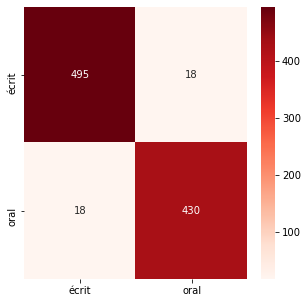

****************************************************************************************************
SVM


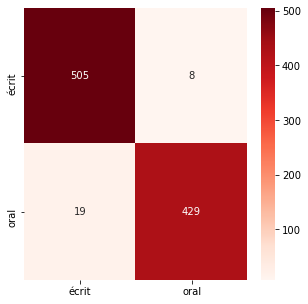

****************************************************************************************************
Nearest Neighbors


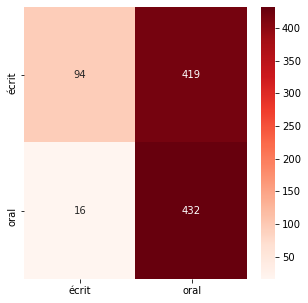

****************************************************************************************************
Random Forest


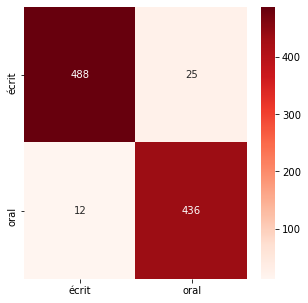

****************************************************************************************************
DecisionTree


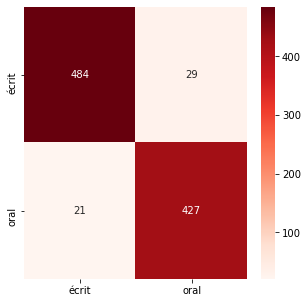

****************************************************************************************************
Voici l'ordre de classement des classifieurs [['SVM', 0.97], ['Random Forest', 0.96], ['Perceptron', 0.96], ['DecisionTree', 0.95], ['Nearest Neighbors', 0.55]]


In [14]:
#SEULEMENT SUR DIFFERENTS CLASSIFIEURS, AVEC MEME PRETRAITEMENTS
V = CountVectorizer()
X = V.fit_transform(X1)

#faire varier taille test_size et en tirer graphiques
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
dico_acc_g = {}

for nom, classif in liste_classif:
    classif.fit(X_train, y_train)
    y_pred = classif.predict(X_test)
    dico_acc_g[nom]=round(accuracy_score(y_test,y_pred),2)
    print(nom)
    fig, ax = plt.subplots(figsize=(5,5))
    classes = ["√©crit", "oral"]
    matrice_confusion = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrice_confusion, cmap = plt.cm.Reds, 
                xticklabels=classes, yticklabels=classes, 
                annot=True, fmt ="d")

#     nom_img = "oralecrit_conf_matrix_%s.png"%nom
#     plt.title(nom)
#     plt.savefig(nom_img)
    plt.show()
    print("*"*100)
    
dico_acc_g_trie = trier_dic(dico_acc_g)

print("Voici l'ordre de classement des classifieurs",dico_acc_g_trie)

On teste chaque pr√©traitement sur chaque classifieur

In [15]:
#BOUCLE SUR PRETRAITEMENTS + CLASSIFIEURS 
#tester individuellement chaque pr√©-traitement combin√© √† chaque classifieur
import time
start_time = time.time()
dico_acc = {}

for nom_param, vec in liste_param:
    #pr√©ciser quel jeu de donn√©es sinon va le redemander √† chaque it√©ration
    X = V.fit_transform(X1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

    for nom, classif in liste_classif:
        classif.fit(X_train, y_train)
        y_pred = classif.predict(X_test)
        dico_acc[nom+" / "+nom_param]=round(accuracy_score(y_test,y_pred),2)
        
print("--- %s seconds ---" % (time.time() - start_time))

--- 31.65081238746643 seconds ---


In [16]:
#pour extraire seulement les meilleurs et les pires scores (plus lisible)
dico_acc_trie = trier_dic(dico_acc)

print("Les 5 meilleurs : ".upper())
for parametres, score in dico_acc_trie[:5]:
    print(parametres, score)
   
print("\nLes 5 pires : ".upper())
for parametres, score in dico_acc_trie[-5:]:
    print(parametres, score)  

LES 5 MEILLEURS : 
SVM / sans stop_words 0.97
SVM / par caract√®re 0.97
SVM / avec bigrammes 0.97
SVM / avec 500 mots 0.97
SVM / avec 2000 mots 0.97

LES 5 PIRES : 
Nearest Neighbors / par caract√®re 0.55
Nearest Neighbors / avec bigrammes 0.55
Nearest Neighbors / avec 500 mots 0.55
Nearest Neighbors / avec 2000 mots 0.55
Nearest Neighbors / avec 1000 mots 0.55


On combine plusieurs pr√©-traitements sur chaque classifieur

In [17]:
#BOUCLE POUR AVOIR DIFFERENTS CLASSIFIEURS ET POUR CHACUN, COMBINAISON DE N-GRAMMES + 1 AUTRE PRETRAITEMENT (ou 2)
import time
start_time = time.time()
#dico json forme {nom_classif_param : {y_test:vlr, y_pred:vlr}}
# X1,y,stopw = choix_data(1)
stopw = set(stopwords.words('french'))
dico_json = {}
liste_vectorizer = []
liste_vectorizer_1000 = []
liste_vectorizer_stop = []
liste_vectorizer_all = []
liste_v = [["sans pr√©-traitements",liste_vectorizer],
           ["seulement les 1000 mots les plus fr√©quents",liste_vectorizer_1000],
           ["sans stopwords",liste_vectorizer_stop],
           ["seulement 1000 mots et sans stopwords", liste_vectorizer_all]]

for analyzer in ["word", "char"]:
    a = analyzer
    for n in range(10):
        nom = a+" "+str(n)
        liste_vectorizer.append([nom, TfidfVectorizer(analyzer=a, ngram_range=(n,n))])
        liste_vectorizer_1000.append([nom, TfidfVectorizer(analyzer=a, ngram_range=(n,n), max_features=1000)])
        liste_vectorizer_stop.append([nom, TfidfVectorizer(analyzer=a, ngram_range=(n,n), stop_words=stopw)])
        liste_vectorizer_all.append([nom, TfidfVectorizer(analyzer=a, ngram_range=(n,n), max_features=1000, stop_words=stopw)])

dico_acc2 = {}
for nom_l, liste in liste_v :
    for nom_param, vec in liste:
        V = vec

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
        for nom_c, classif in liste_classif:
            classif.fit(X_train, y_train)
            y_pred = classif.predict(X_test)
            dico_acc2[nom_c+" / "+nom_l+" / "+nom_param]="%.2f"%accuracy_score(y_test,y_pred)
        dico_json[nom_c+" / "+nom_l+" / "+nom_param]={}
        dico_json[nom_c+" / "+nom_l+" / "+nom_param]["y_test"]=y_test
        dico_json[nom_c+" / "+nom_l+" / "+nom_param]["y_pred"]=y_pred

print("--- %s seconds ---" % (time.time() - start_time))

--- 410.67360520362854 seconds ---


In [18]:
#pour extraire seulement les meilleurs et les pires scores (plus lisible)
dico_acc2_trie = trier_dic(dico_acc2)

#meilleur affichage : 
print("Les 10 meilleurs : ".upper())
for parametres, score in dico_acc2_trie[:10]:
    print(parametres, score)
   
print("\nLes 10 pires : ".upper())
for parametres, score in dico_acc2_trie[-10:]:
    print(parametres, score)  
    
#Comme √ßa prend du temps d'obtenir tous ces r√©sultats, on sauvegarde tous les accuracy_score obtenus dans un json
# w = open("accuracy_allclassif_tweets_tfidf.json", "w", encoding="utf-8")
# w.write(json.dumps(dico_acc2_trie, indent=2, ensure_ascii=False))
# w.close()

LES 10 MEILLEURS : 
SVM / seulement les 1000 mots les plus fr√©quents / word 9 0.97
SVM / seulement les 1000 mots les plus fr√©quents / word 8 0.97
SVM / seulement les 1000 mots les plus fr√©quents / word 7 0.97
SVM / seulement les 1000 mots les plus fr√©quents / word 6 0.97
SVM / seulement les 1000 mots les plus fr√©quents / word 5 0.97
SVM / seulement les 1000 mots les plus fr√©quents / word 4 0.97
SVM / seulement les 1000 mots les plus fr√©quents / word 3 0.97
SVM / seulement les 1000 mots les plus fr√©quents / word 2 0.97
SVM / seulement les 1000 mots les plus fr√©quents / word 1 0.97
SVM / seulement les 1000 mots les plus fr√©quents / word 0 0.97

LES 10 PIRES : 
Nearest Neighbors / sans pr√©-traitements / char 9 0.55
Nearest Neighbors / sans pr√©-traitements / char 8 0.55
Nearest Neighbors / sans pr√©-traitements / char 7 0.55
Nearest Neighbors / sans pr√©-traitements / char 6 0.55
Nearest Neighbors / sans pr√©-traitements / char 5 0.55
Nearest Neighbors / sans pr√©-traitements /

On regarde les erreurs qui persistent dans le code, m√™me avec les meilleures combinaisons

In [32]:
def not_match(y_test,y_pred,X1):
    ''' Fonction qui renvoie les mauvaises classifications d'un mod√®le'''
    y_test = y_test.to_dict()
    i=0
    not_match_positifs = []
    not_match_negatifs = []
    for yp_k, yp_v in y_test.items():
        if y_pred[i] != y_test[yp_k]:
            #si la pr√©diction est 1 et la valeur r√©elle 0 = croit que positif alors que n√©gatif
            if y_pred[i] > y_test[yp_k]:
                not_match_positifs.append(X1[yp_k])
            else:
                not_match_negatifs.append(X1[yp_k])
        i+=1

    return not_match_positifs,not_match_negatifs
                    
#meilleure combinaison
#V = CountVectorizer(stop_words=stopw)
V = CountVectorizer()
X = V.fit_transform(X1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
phr_not_match_positifs, phr_not_match_negatifs = not_match(y_test,y_pred,X1)

In [43]:
print("Il y a",len(phr_not_match_positifs), "phrases class√©es orales alors qu'elles sont en r√©alit√© √©crites. En voici quelques exemples :")
for i in range (5):
    print("\n\t",phr_not_match_positifs[i])
print("-"*80)
print("Il y a",len(phr_not_match_negatifs), "phrases class√©es √©crites alors qu'elles sont en r√©alit√© orales. En voici quelques exemples :")
for i in range (5):
    print("\n\t",phr_not_match_negatifs[i])

Il y a 8 phrases class√©es orales alors qu'elles sont en r√©alit√© √©crites. En voici quelques exemples :

	 faire, m√™me quand on se dit ¬´oh l√† l√† mais c'est pas possible !¬ª, comme dans The Wedding Singer ou Punch-Drunk Love, on l'aime. Il fallait que H

	 cela l'a rendu si beau, √ßa changeait tout. Et l√† on s'est dit ¬´ah, d'accord, ce genre de truc est possible ¬ª C'est ce qu'il a fait pour Uncut Ge

	 m√™me pas les filmer en gros plans !¬ª Mais on s'en fiche ! On ne fait pas √ßa pour les gros plans, on fait √ßa pour les com√©diens et parce qu'on le 

	 a vous rend tr√®s vuln√©rable de jouer une sc√®ne de sexe. Parfois vous √™tes d√©shabill√©, parfois pas, mais √©motion-nellement vous √™tes toujours nu. 

	 st pas Giscard qui est moderne, ce sont les photographes de l'agence Gamma dont je suis alors le directeur. On a des appareils l√©gers, on est bon
--------------------------------------------------------------------------------
Il y a 19 phrases class√©es √©crites alors qu'e

# Classification des tweets

In [34]:
#APPLIQUER CLASSIFIEUR AUX TWEETS
def ouvrir_json(chemin):
  f = open(chemin, encoding="utf-8")
  toto = json.load(f)
  f.close()
  return toto

tweets = ouvrir_json("corpus/1700tweets.json")


X_tweets = V.transform(tweets)
pred = clf.predict(X_tweets)

d = {}
for t in pred:
    d.setdefault(t, 0)
    d[t]+=1
print(d)

{0: 1650, 1: 50}


## Tweets classifi√©s oraux

In [41]:
for i,tweet in enumerate(tweets):
    #print(tweet,pred[i])
    if pred[i]==1:
        print(tweet, pred[i])
        print("*"*80)

@LCI Cette apr√®s midi nous sommes all√©s voir le film sur notre Dame. 
√Ä un moment on voit Dame hidalgo, dans le film. 
Gros malaise dans la salle.... 
On a tous ri.on ne s y attendait pas. 
Par contre bel hommage aux pompiers,  et √† ce que repr√©sente Notre-Dame.  Donc allez le voir 1
********************************************************************************
@ZacheeLePub @HanamiUkiyoe @Exlibris401 @JLMelenchon Le principe c'est pas de rester bloqu√© sur le m√©t√©ore, mais de comprendre la phrase comme "restez dans le d√©ni". Le contraire "look up" ce serait "voir la r√©alit√© en face", et dans le film c'est -&gt; regarder le m√©t√©ore. 1
********************************************************************************
@kxmece @MatteoSapin Bah c'est les 2 premiers films du Sony's Spider-Man Universe.
Disons que √ßa commence pas tr√®s bien quoi...
Les 3 derniers Spiderman sont du cru MCU qui rentre pas dans l'univers de Sony doooonc...
Morbius est le 3eme film de ce nouvel unive

## Tweets classifi√©s √©crits

In [36]:
for i,tweet in enumerate(tweets):
    #print(tweet,pred[i])
    if pred[i]==0:
        print(tweet, pred[i])
        print("*"*80)

RT @MarvelStory_: Vous l‚Äôattendiez, le film √©v√©nement ‚ÄòAVENGERS: ENDGAME‚Äô arrivera le 8 avril sur Disney+ en France ! https://t.co/pNAsY5rg‚Ä¶ 0
********************************************************************************
RT @viewsfrance: Pour Netflix, Kid Cudi va √©crire et r√©aliser son premier film ! Il jouera √©galement dedans.

Intitul√© "Teddy", le long-m√©t‚Ä¶ 0
********************************************************************************
RT @sentieriselvagg: 40¬∞ Torino Film Festival: le¬†anticipazioni https://t.co/x7VHP0ZMxD 0
********************************************************************************
RT @eviltwin_horror: Je me rend compte que je ne partage pas a chaque fois le #witchingwatchlist challenge de @HorroriteS 
Je corrige ce so‚Ä¶ 0
********************************************************************************
RT @carolyonne89: Le film d‚ÄôArte qui montre que l‚ÄôUkraine est une plaque tournante du trafic international d‚Äôenfants https://t.co/

@MarinaRavidat @LabouryMarine j‚Äôai vu le tweet passer hier et j‚Äôai toujours pas trouv√© le film parfait ü•≤ 0
********************************************************************************
@normand95244005 @Le_Figaro Arr√™tez de r√™ver et comprenez une fois pour toute que les maliens ne veulent plus de vous tournez la page se mentir √† sois ne fait pas √©voluer le film est termin√© 0
********************************************************************************
Je sors de #TheBatman le film est incroyable l‚Äôatmosph√®re est bien sombre, la bande son est parfaite Robert Pattinson quel acteur il r√©pond √† toutes les critiques et joue extr√™mement bien le r√¥le et l‚Äôalchimie avec Catwoman rien √† dire. J‚Äôai h√¢te de voir la suite https://t.co/cc2VkBAwDh 0
********************************************************************************
RT @JVCom: Alerte Rouge est un immense succ√®s sur Disney+ !

Le film d'animation signe le meilleur d√©marrage de la plateforme (en nombre d'

********************************************************************************
Vrmt trop fan du concept des factions le film est lourd :,( https://t.co/oHlF1qUvoJ 0
********************************************************************************
Le film retrace l'histoire de @LauraetAlice et de #JulieDouib üåπüïä

Toutes nos pens√©es vont √† Julie, ses parents, ses enfants.
Ainsi qu'√† Laura, qui continu son combat contre les violences faites aux femmes et pour les enfants. 

Il sera diffus√© le 29 mars sur nos √©crans . https://t.co/MbniVeF1LZ 0
********************************************************************************
@Ramprab42727566 @MrDhaniyala @PKadmirer03 Brother, miru movie disaster ayina frustration lo unnaru ani telisindi le... 

So, mi movie disaster ayite maa movie rotta film, waste film antaru yenti..? 

Rotta/utter flop ayitene 100cr varaku vachindaa bro collections.? 0
********************************************************************************
RT @SeriesUp

********************************************************************************
RT @KatBoyFR: PS : Si vous voulez savoir le genre de tweet qu'on m'as reproch√© c'√©tait par exemple un tweet disant "Ya un mec qui porte un‚Ä¶ 0
********************************************************************************
@HorizonUnivers Super s√©rie j ai ador√© ....le film sur Netflix bcp moins 0
********************************************************************************
RT @Ryo_Saeba_3: Premi√®re image de ÈáëÊâãÊåá Golden Finger de Felix Chong (Project Gutenberg) avec Andy Lau, Tony Leung Chiu-wai, Simon Yam, Char‚Ä¶ 0
********************************************************************************
@MarcCassivi Par curiosit√© morbide ou int√©r√™t? Vraiment je suis heureux d'avoir arr√™t√© apr√®s le premier film et fini le tout sur une bonne note. 0
********************************************************************************
@Lamdallas2 Non mais le gars a droit d'expliquer comment il l'a r√©

RT @SeriesUpdateFR: Il y a 8 ans, le film Divergente sortait au cin√©ma. https://t.co/zfua1pcA2C 0
********************************************************************************
RT @KonixInteract: √Ä l‚Äôoccasion de la sortie du film #Morbius le 30 mars, on organise un jeu concours avec @SonyPicturesFr ! Pour participe‚Ä¶ 0
********************************************************************************
RT @anne_sinclair: Tr√®s √©mue de voir le nom de mon grand p√®re en titre de cet avant papier √©logieux de @RenaudMachart  @lemondefr. Il parle‚Ä¶ 0
********************************************************************************
RT @AndreAr94310915: Nos Jeunesses Communistes, avec l'argent des taxes, produisent un film de propagande politique pour attaquer Duhaime e‚Ä¶ 0
********************************************************************************
J‚Äôai vu ce film en avant premi√®re en janvier Il sort demain Je vous le conseille vivement üé¨ 
#lombredunmensonge 
#boulilanners √†